# U.N. Data Exploration File

### Nashville Software School class assignment, working with the U.N. files for GDP Per Capita, and Internet Use.

###### INSTRUCTIONS FROM CLASS README FILE:  
###### 1. Create a data folder in your local project repository.
###### 2. Download these two CSV files and place them in the data folder:  
---> Gross Domestic Product (GDP) per capita 
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD     
DO NOT APPLY ANY FILTERS  
rename the file to gdp_percapita.csv  
open it with a text editor (not excel) and take a look
---> Percentage of Individuals using the Internet 
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  
DO NOT APPLY ANY FILTERS  
rename the file to internet_use.csv  
open it with a text editor (not excel) and take a look
###### 3.a. Launch a Jupyter Notebook.  
IMPORTANT: You are likely to get errors along the way. 
When you do, read the errors to try to understand what is happening and how to correct it.
Use markdown cells to record your answers to any questions asked in this exercise. 
On the menu bar, you can toggle the cell type from Code to Markdown.   
###### 3.b. Import the required packages with their customary aliases as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time.  
###### 4. Use the %matplotlib inline command so that your plots shows in the notebook without having to call plt.show() every time.

In [1]:
#This code accomplishes instruction #3b and 4.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### 5. Using the pandas read_csv() functio, read the GDP dataset into your notebook as a DataFrame called gdp_dr. Take a look at the first 6 rows. 
-----> Reading in 6729 rows, only, to avoid getting footers.    
-----> Viewed data in text editor to find number of rows wanted, importing only 6729 rows (through Zimbabwe 1990)

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)  
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


###### 6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.
-----> Original data contains 190 rows of footnotes, which cause an error if they are imported.  
-----> Viewed data in text editor to find number of rows wanted, importing only 4495 rows (through Zimbabwe 1990)

In [3]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


##### 7. Look at the shape of each dataframe - how many rows, how many columns.

In [4]:
gdp_df.shape

(6729, 4)

In [5]:
internet_df.shape

(4495, 4)

##### ANSWER #7:   
gdp_df        has 6729 rows, 4 columns  
internet_df   has 4495 rows, 4 columns*  

##### 8. Take a look at the data types for the columns in each table.

In [6]:
#gdp_df.get_dtype_counts()
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
#gdp_df.get_dtype_counts()
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
#Alternate method, to see a bit more information.
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
Country or Area    6729 non-null object
Year               6729 non-null int64
Value              6729 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [9]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
Value Footnotes    948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.5+ KB


##### ANSWER #8:    
For both dataframes, first two columns are objects, last two are float64

#####  9. Take a look at the last 10 rows of each dataset in turn.

In [10]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [11]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


##### 10. Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [12]:
#Alternate method:  gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1) .... 0=rows, 1=columns
#If wanting to drop multiple columns, would need brackets around the list of columns being dropped.
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [13]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [14]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [15]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.4+ KB


##### ANSWER #10  
Confirmed that the Value Footnotes has been dropped   

##### 11. Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [16]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


##### 12. Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [17]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


##### 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [18]:
#Sequence matters in the on= argument. Looks for Country first, then year.
#By having each element on separate line, error messages will point to line that has the problem.
gdp_and_internet_use = pd.merge(gdp_df, 
                                internet_df, 
                                how='outer', 
                                on=['Country', 'Year'])

In [19]:
gdp_and_internet_use.shape

(7705, 4)

##### 14. Look at the first five rows of your new data frame to confirm it merged correctly.

In [20]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


##### 15. Look at the last five rows to make sure the data is clean and as expected.

In [21]:
gdp_and_internet_use.sort_values(by = 'Country', ascending = True).tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6702,Zimbabwe,2016,2489.097494,NaN
6701,Zimbabwe,2017,2568.410072,NaN
6700,Zimbabwe,2018,2688.406942,NaN
6713,Zimbabwe,2005,1974.645081,8.015978
6727,Zimbabwe,1991,2906.272849,NaN


In [22]:
#Final, merged, cleaned dataframe has 3519 rows and 4 columns
gdp_and_internet_use.shape

(7705, 4)

##### 16. Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [23]:
#ALTERNATE METHOD #1 from Nicole - uses .isin:
#  gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
#  Above doesn't save data that isn't in those 3 years.
#  .isin creates T/F for year, to see this can just run:   gdp_and_internet_use["Year"].isin([2004, 2009, 2014])
# 
# ALTERNATE METHOD #2 from Diego - Clean! But Mahesh doesn't know exacly why it works,lol.
gdp_internet_2004_2009_2014 = gdp_and_internet_use.query('Year == (2004,2009,2014)')
gdp_internet_2004_2009_2014.head()

#THIS WAS MY ORIGIAL CODE which also worked.
#my_list_2004_09_14 = ['2004', '2009', '2014']
#gdp_internet_2004_2009_2014 = gdp_and_internet_use.query("Year in @my_list_2004_09_14")
#gdp_internet_2004_2009_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


#####  17. Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [24]:
# ALTERNATE METHOD from Pam (for 2004 only).  Okay to not know mask... fine to use .loc, .iloc, .query
#    mask_2004 = gdp_and_internet_use_df['Year'] == 2004
#    mask_2004_df = gdp_and_internet_use_df [mask_2004]
#    print(mask_2004_df)

# I had originally done these in 3 separate code blocks. Okay to do all at once.
y04_gdp_internet = gdp_and_internet_use.query("Year == 2004")
y09_gdp_internet  = gdp_and_internet_use.query("Year == 2009")
y14_gdp_internet = gdp_and_internet_use.query("Year == 2014")

In [25]:
type(y09_gdp_internet)

pandas.core.frame.DataFrame

##### 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).   
ANSWER:  Iceland had highest percentage of internet users in 2014: 98.16%

In [26]:
# Ari's approach: Calls out only one column from sort as head. Easy!
# gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=False).head(1)

#From Mary:
y14_gdp_internet.loc[y14_gdp_internet['Internet_Users_Pct'].idxmax()]

# My original code... had to do .loc in order to get the full row, not just the 98.16 max amount.
#y14_gdp_internet.loc[y14_gdp_internet['Internet_Users_Pct'] 
#                     == y14_gdp_internet['Internet_Users_Pct'].max()]

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 2581, dtype: object

##### 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?    
Korea had lowest percentage of internet users in 2014: 1.14%

In [27]:
y14_gdp_internet.loc[y14_gdp_internet['Internet_Users_Pct'] 
                     == y14_gdp_internet['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


##### 20. Repeat for 2004 and 2009.

In [28]:
y04_gdp_internet.loc[y04_gdp_internet['Internet_Users_Pct'] 
                     == y04_gdp_internet['Internet_Users_Pct'].max()]
#2004 highest use = Sweden

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89


In [29]:
y04_gdp_internet.loc[y04_gdp_internet['Internet_Users_Pct'] 
                     == y04_gdp_internet['Internet_Users_Pct'].min()]
#2004 lowest use = Korea

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


In [30]:
y09_gdp_internet.loc[y09_gdp_internet['Internet_Users_Pct'] 
                     == y09_gdp_internet['Internet_Users_Pct'].max()]
#2009 highest use = Iceland

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.0


In [31]:
y09_gdp_internet.loc[y09_gdp_internet['Internet_Users_Pct'] 
                     == y09_gdp_internet['Internet_Users_Pct'].min()]
#2009 lowest use = Korea

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


##### 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?   
Highest GDP per Capida in 2014:  Macao SAR, China, 130,439

In [32]:
y14_gdp_internet.loc[y14_gdp_internet['GDP_Per_Capita'] 
                == y14_gdp_internet['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


##### 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?    
Lowest GDP Per Capita Central African Republic, 672.68

In [33]:
y14_gdp_internet.loc[y14_gdp_internet['GDP_Per_Capita'] 
                    == y14_gdp_internet['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


##### 23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita   
b. 2009 Percent Using the Internet vs GDP Per Capita   
c. 2014 Percent Using the Internet vs GDP Per Capita   

In [34]:
#To create subset with 2004 data
gdp_internet_2004 = gdp_and_internet_use.query("Year == 2004")
gdp_internet_2004.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.105809
31,Albania,2004,7001.054082,2.420388
60,Algeria,2004,11845.170512,4.634475


In [35]:
#To create subset with 2009 data
gdp_internet_2009 = gdp_and_internet_use.query("Year == 2009")
gdp_internet_2009.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1502.354073,3.55
26,Albania,2009,9525.377979,41.20
55,Algeria,2009,12697.690780,11.23


In [36]:
#To create subset with 2014 data
gdp_internet_2014 = gdp_and_internet_use.query("Year == 2014")
gdp_internet_2014.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09


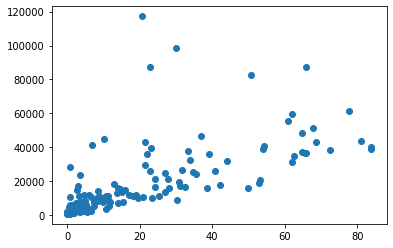

In [37]:
#Alternate method, can identify columns in initial scatter plot code x,y.
#CLEAN!
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita);

#MY ORIGINAL CODE:
#plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita',
#            data = gdp_internet_2004)
#plt.xlabel('Percent Using the Intenet')
#plt.ylabel('GDP Per Capita')
#plt.title('Internet vs GDP for 2004', color = 'green');

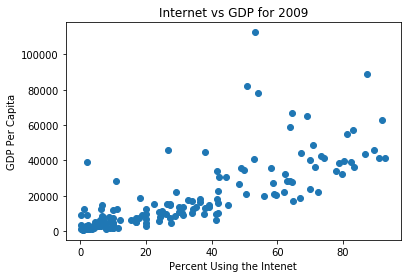

In [38]:
plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita',
            data = gdp_internet_2009)
plt.xlabel('Percent Using the Intenet')
plt.ylabel('GDP Per Capita')
plt.title('Internet vs GDP for 2009');

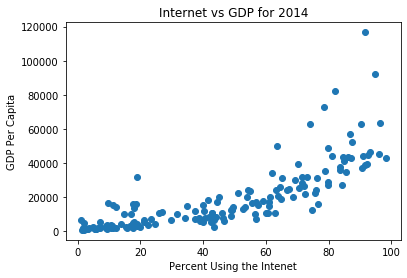

In [39]:
plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita',
            data = gdp_internet_2014)
plt.xlabel('Percent Using the Intenet')
plt.ylabel('GDP Per Capita')
plt.title('Internet vs GDP for 2014');

##### 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.   
1. There are fewer outliers, more consistency, in later years - wiht a general increase in the Percent Using the Internet. 
2. In 2004 the countries with similar GDP Per Capita often had substantially different levels of internet usage. But by 2014 this had smoothed out and countries with similar GDP also had similar internet usage.
3. Internet use generally increased over the years, but not for everyone. The lowest rate of usage was still at the same very low rate in 2014, so the poorest countries saw no improvement.
4. In 2004 there were several countries with GDP Per Captia above 40k that had internet usage rates between 20% to 60%. However by 2014 all countries with 40k GDP Per Capita had internet usage rates above 60%. 




##### 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?   
--->  Yes, it's unimodal for GDP

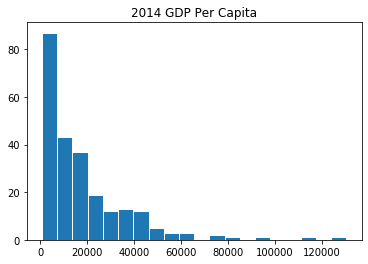

In [55]:
#Bins default is 10, only need to specifi if want something different.
plt.hist(gdp_internet_2014['GDP_Per_Capita'], edgecolor='white', bins = 20)   
plt.title('2014 GDP Per Capita');

##### 26. Look at the distribution of Internet Use for 2014. Is it unimodal?   
--->  Not unimodal for percent internet use.

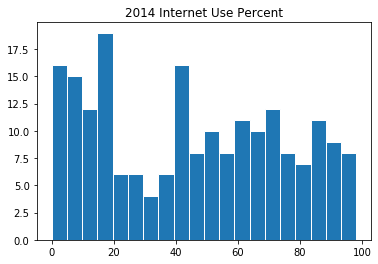

In [41]:
plt.hist(gdp_internet_2014['Internet_Users_Pct'], edgecolor='white', bins = 20)
plt.title('2014 Internet Use Percent');

#ALTERNATE METHOD: To get rid of null values (from Mahesh)
#plt.hist(gdp_internet_2014[gdp_internet_2014['GDP_Per_Capita'].notnull()]['GDP_Per_Capita'], edgecolor='white', bins = 20);

#ALTERNATE #2 from Antonio... uses Matplotlib-- interesting.
#gdp_internet_2014.hist(column = 'Internet_Users_Pct')


##### 27. What are the top 5 countries in terms of internet use in 2014?

In [42]:
#gdp_internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

#ALTERNATE from Sophia... also makes it into a list so use later. 
#  The .Country pulls out ONLY the country names, and makes them into a list, to use in question 28. Cool.
top_5_internet_2014 = gdp_internet_2014.sort_values(by='Internet_Users_Pct', ascending = False).Country[0:5].to_list()
print(top_5_internet_2014)

['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']


##### 28. Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [43]:
top_5_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet = gdp_internet_2004_2009_2014.query("Country in @top_5_list").sort_values(by = ['Country', 'Year'])
top_5_internet

# ALTERNATE code from Diego, uses .isin then .sort_values 
#top_5_internet = gdp_internet_2004_2009_2014[
#    gdp_internet_2004_2009_2014.Country.isin(
#        gdp_internet_2014.sort_values(
#           'Internet_Users_Pct', ascending = False).Country.head(5))]
#top_5_internet



,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6742,Andorra,2004,NaN,26.837954
6737,Andorra,2009,NaN,78.530000
6732,Andorra,2014,NaN,95.900000
547,Bermuda,2004,55452.638880,60.990867
542,Bermuda,2009,57151.919132,83.250000
6772,Bermuda,2014,NaN,96.800000
1414,Denmark,2004,43670.446201,80.930000
1409,Denmark,2009,43382.615688,86.840000
1404,Denmark,2014,45057.083449,95.990000
2591,Iceland,2004,38893.378798,83.880000


##### 29. a. Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014).  ---b. Which country had the greatest growth between 2004 and 2014.  ---c. Is there a plotting issue with Bermuda? Can you fix it?    
a. FacetGrids are below   
b. The country with greatest growth between 2004 and 2014 is Andorra   
c. Fixed by adding .sort_values(by = 'Year') in above code block

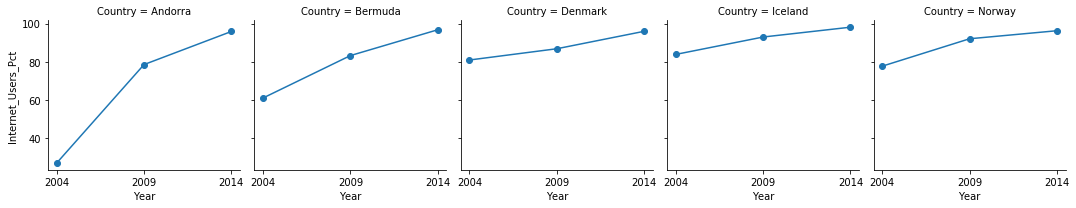

In [44]:
#This initializes a FacetGrid structure, and saves it in a variable called "g" a.k.a. grid)
#The final semi-colon eliminates the text at the top that otherwise shows up, saying
#where the data is stored:  <seaborn.axisgrid.FacetGrid at 0x1d9b97f65f8>
g = sns.FacetGrid(top_5_internet, col="Country")
g = g.map(plt.plot, "Year", "Internet_Users_Pct", marker="o") 
g.set(xticks=[2004, 2009, 2014]);

#ALTERNATE from Media
# top_internet = sns.FacetGrid(top_5_internet_sorted, col="Country")  #This uses df name instaed of g
# top_internet.map(plt.plot, "Year", "Internet_User_Pct"); 


##### 30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?
a. FacetGrids are below   
b. The country that has consistently had the least internet use is Korea

In [45]:
gdp_internet_2014.sort_values(by = 'Internet_Users_Pct').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


In [46]:
bottom_5_list = ["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
bottom_5_internet = gdp_internet_2004_2009_2014.query("Country in @bottom_5_list")
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1722,Eritrea,2009,1950.533339,0.540000
1727,Eritrea,2004,2317.349879,NaN
6044,Timor-Leste,2014,6466.737732,1.140000
6049,Timor-Leste,2009,9275.529371,0.185252
6054,Timor-Leste,2004,4898.575839,NaN
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000


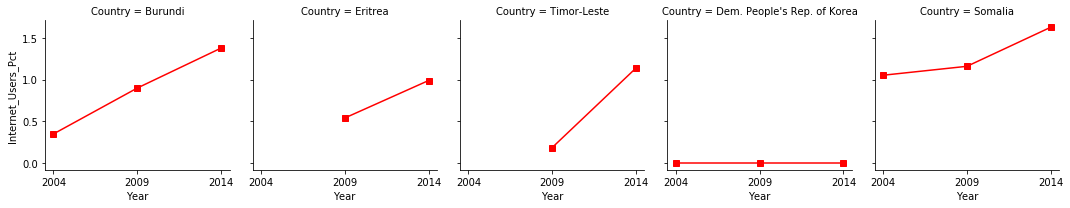

In [47]:
g = sns.FacetGrid(bottom_5_internet, col="Country")
g = g.map(plt.plot, "Year", "Internet_Users_Pct", marker="s", color="r") 
g.set(xticks=[2004, 2009, 2014]);

##### 31. a.  Find the top 5 countries for 2014 in terms of GDP per capita; .....b. create a dataframe to look at 10-year trends in gdp per capita for those 5 countries (2004 to 2014... can use existing subset of data, per Pam/Mary). ..... c. Use a seaborn facet grid for this.

In [48]:
#31.a. Find the top 5 countries for 2014 in terms of GDP per capita
gdp_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [49]:
#31.b. create a dataframe to look at 10-year trends in gdp per capita for those 5 countries.
#Note from Pam/Mary:  Can use 2004, 2009, 2014 data to see 10-year trend. Don't have to group by decade.
top_5_gdp = ["Macao SAR, China", 'Qatar', 'Luxembourg', 'Singapore', 'Brunei']
top5gdp_df = gdp_internet_2004_2009_2014.query("Country in @top_5_gdp")
top5gdp_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
707,Brunei,2014,76448.593329,NaN
712,Brunei,2009,79485.001581,NaN
717,Brunei,2004,83963.238066,NaN
3610,Luxembourg,2014,92349.186429,94.67
3615,Luxembourg,2009,89098.734264,87.31


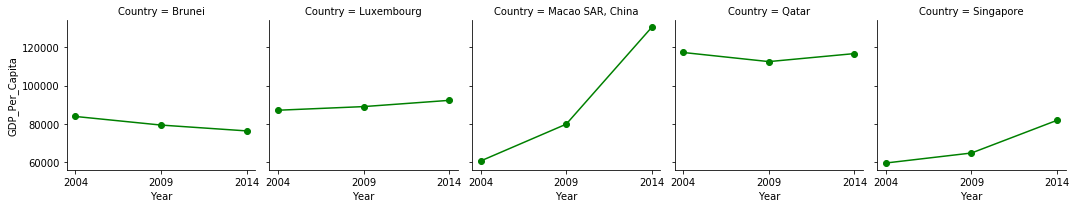

In [50]:
#31.c. Use a seaborn facet grid for this.
g = sns.FacetGrid(top5gdp_df, col="Country")
g = g.map(plt.plot, "Year", "GDP_Per_Capita", marker="o", color="g") 
g.set(xticks=[2004, 2009, 2014]);

##### 32. Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [51]:
#32.b. create a dataframe to look at 10-year trends in gdp per capita for those 5 countries.
gdp_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


##### Questions 29-32, alternate code from Mahesh (uses his df names)
bottom_5_gdp = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()].sort_values(by = 'GDP_Per_Capita', ascending = False).tail()['Country'].tolist()

gdp_and_internet_bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(bottom_5_gdp))&
                                                  (gdp_and_internet_use['Year']>= 2004)&
                                                  (gdp_and_internet_use['Year']<=2014)].sort_values(['Country', 'Year'])

g = sns.FacetGrid(gdp_and_internet_bottom_5_gdp, col = 'Country')
g.map(plt.plot, 'Year', 'GDP_Per_Capita');


In [52]:
#32.a. Find the BOTTOM 5 countries for 2014 in terms of GDP per capita
bottom_5_gdp = ["Central African Republic", 'Burundi', "Dem. Rep. Congo", 'Niger', 'Malawi']
bottom5gdp_df = gdp_internet_2004_2009_2014.query("Country in @bottom_5_gdp")
bottom5gdp_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.38000
799,Burundi,2009,721.063140,0.90000
804,Burundi,2004,708.833720,0.34906
1014,Central African Republic,2014,672.681648,NaN
1019,Central African Republic,2009,949.551325,NaN


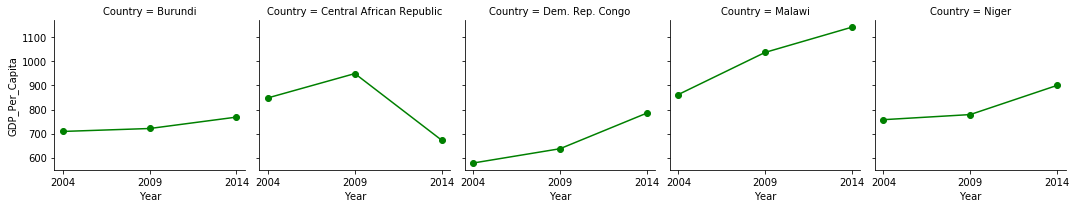

In [53]:
#32.c. Use a seaborn facet grid for this.
g = sns.FacetGrid(bottom5gdp_df, col="Country")
g = g.map(plt.plot, "Year", "GDP_Per_Capita", marker="o", color="g") 
g.set(xticks=[2004, 2009, 2014]);

##### 33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?    
There was a civil war in Central African Republic that started in Nov. 2012, with ramifications through 2013. This caused a large reduction in GDP in 2013/2014.
https://en.wikipedia.org/wiki/Central_African_Republic   